In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
df = pd.read_csv('edat_aes_l21.tsv', sep='\t')
df[['n_lang', 'unit', 'sex', 'geo']] = df['n_lang,unit,sex,geo\\time'].str.split(',', expand=True)
df.columns = df.columns.str.replace(' ', '')
df = df.drop(df.columns[0], axis=1)
print(df)

       2016    2011   2007 n_lang unit sex   geo
0     64.8       :      :       0   PC   F    AL
1     12.4    19.7   20.1       0   PC   F    AT
2     62.8       :      :       0   PC   F    BA
3     22.2   45.0 b  33.6       0   PC   F    BE
4     48.3   59.2 b  42.7       0   PC   F    BG
5      7.6    10.7      :       0   PC   F    CH
6     10.4    17.3   16.7       0   PC   F    CY
7     19.2    29.3   29.6       0   PC   F    CZ
8     20.7    21.9   28.6       0   PC   F    DE
9      3.7     5.4   12.0       0   PC   F    DK
10    29.6    33.7   35.4       0   PC   F  EA19
11     8.0    14.1   11.3       0   PC   F    EE
12    32.2    41.2   43.6       0   PC   F    EL
13    44.8    49.2   47.1       0   PC   F    ES
14    34.7    34.1   36.9       0   PC   F  EU28
15     5.3     5.9   11.8       0   PC   F    FI
16    40.1   41.8 b  41.0       0   PC   F    FR
17    27.1       :   32.2       0   PC   F    HR
18    57.8   63.0 b  74.1       0   PC   F    HU
19       :    70.4  

      2016    2011   2007 n_lang unit sex geo
92   57.6   63.2 b  74.8       0   PC   T  HU
203  28.6   25.9 b  17.6       1   PC   T  HU
314  11.1    9.2 b   6.3       2   PC   T  HU
425   2.7    1.7 b   1.3     GE3   PC   T  HU


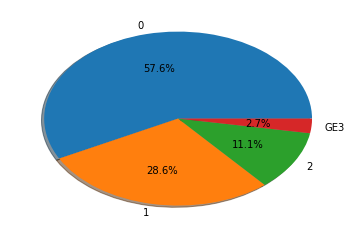

In [43]:
df_hu = df[(df['geo'] == 'HU') & (df['sex'] == 'T')]
print(df_hu)
plt.pie(df_hu['2016'], labels=df_hu['n_lang'], autopct='%1.1f%%', shadow=True)
plt.show()

In [70]:
def get_top(n, n_lang, year):
    df_mono = df[(df['n_lang'] == n_lang) & (df['sex'] == 'T') & (df[year] != ': ')].copy()
    if (n == 0):
        n = len(df_mono)
    df_mono[year] = df_mono[year].str.replace(r'[^0-9.]', '').astype('double')
    df_mono = df_mono.sort_values(by=[year], ascending=False)
    plt.figure(figsize=(10, 8))
    plt.bar(np.arange(n), df_mono[year][:n])
    plt.xticks(np.arange(n), df_mono['geo'])
    plt.show()

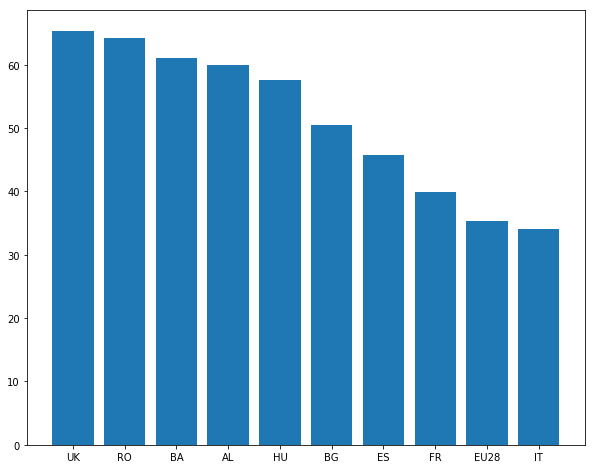

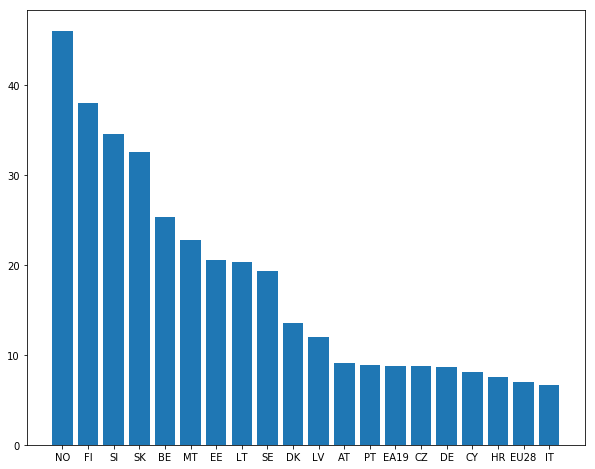

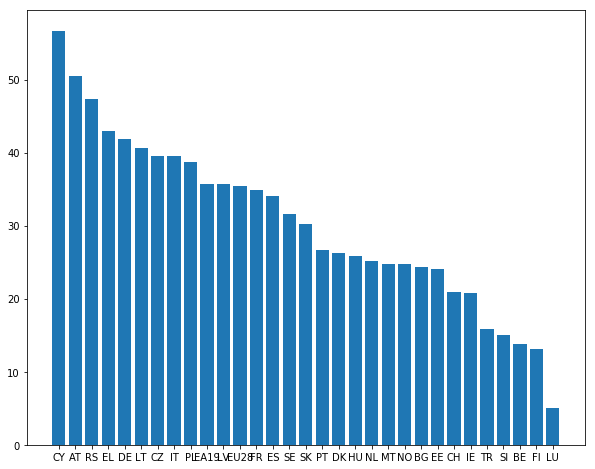

In [71]:
get_top(10, '0', '2016')
get_top(20, 'GE3', '2007')
get_top(0, '1', '2011')